<a href="https://colab.research.google.com/github/Sinchiguano/ai_googleColab/blob/main/classifierIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
url='https://raw.githubusercontent.com/Sinchiguano/ai_googleColab/main/datasetUleamMl/IRIS.csv'
import pandas as pd
dataset=pd.read_csv(url)

Exploring the dataset

In [4]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
dataset.shape

(150, 5)

In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.index

RangeIndex(start=0, stop=150, step=1)

In [8]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
# dataset['target']=dataset['species']

In [13]:
# dataset['target']=dataset[dataset['target']=='Iris-setosa']=1 or dataset[dataset['target']=='Iris-versicolor']=2 or dataset[dataset['target']=='Iris-virginica']=3
tmp=list()
for label in dataset['species']:
  if  label == 'Iris-setosa':
    tmp.append(1)
  elif label=='Iris-versicolor':
    tmp.append(2)
  elif label=='Iris-virginica':
    tmp.append(3)


In [14]:
dataset['target']=tmp

In [15]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3
149,5.9,3.0,5.1,1.8,Iris-virginica,3


In [16]:
dataset['target'][50:]

50     2
51     2
52     2
53     2
54     2
      ..
145    3
146    3
147    3
148    3
149    3
Name: target, Length: 100, dtype: int64

In [17]:
dataset.shape

(150, 6)

In [18]:
dataset['target'].unique()

array([1, 2, 3])

In [19]:
dataset.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width,target
species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [20]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Plotting the dataset

Plotting a dataset is a great way to explore its distribution. Plotting the iris dataset can be done using matplotlib, a Python library for 2D plotting.

In [21]:
import matplotlib.pyplot as plt
#array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


#CREATE SOME FILTER IN ORDER TO ISOLATE SPECIES FROM EACH OTHER
setosaMask=dataset['species']=='Iris-setosa'
versicolorMask=dataset['species']=='Iris-versicolor'
virginicaMask=dataset['species']=='Iris-virginica'



setosa=dataset[setosaMask]
versicolor=dataset[versicolorMask]
virginica=dataset[virginicaMask]

In [22]:
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)
print(setosa.columns)

(50, 6)
(50, 6)
(50, 6)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'target'],
      dtype='object')


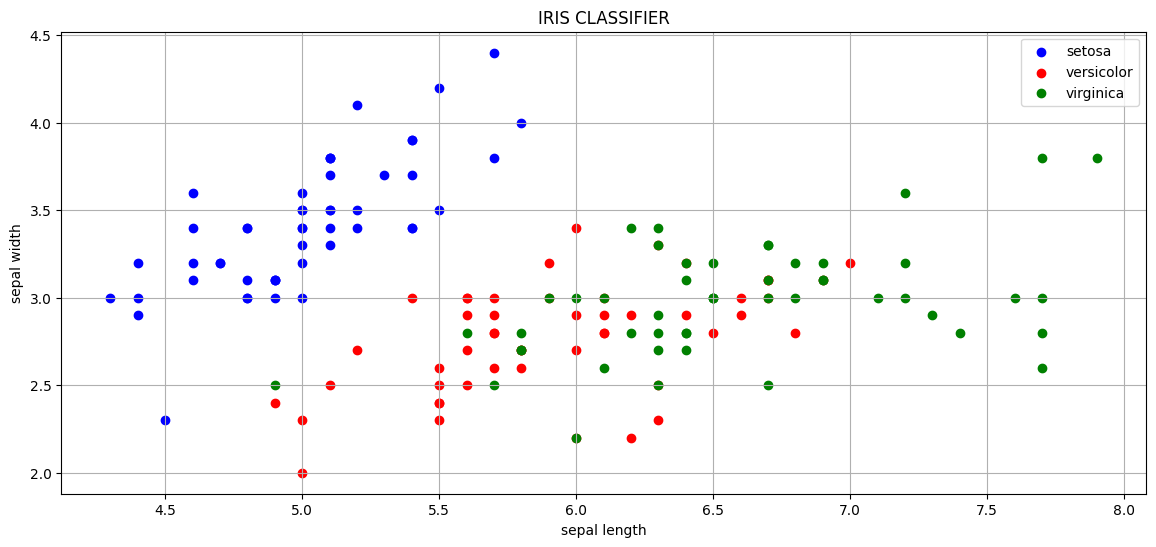

In [23]:
fig,ax=plt.subplots()
fig.set_size_inches(14,6)

ax.scatter(setosa['sepal_length'],setosa['sepal_width'],facecolor='blue',label='setosa')
ax.scatter(versicolor['sepal_length'],versicolor['sepal_width'],facecolor='red',label='versicolor')
ax.scatter(virginica['sepal_length'],virginica['sepal_width'],facecolor='green',label='virginica')

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.grid()
ax.set_title('IRIS CLASSIFIER')
ax.legend()


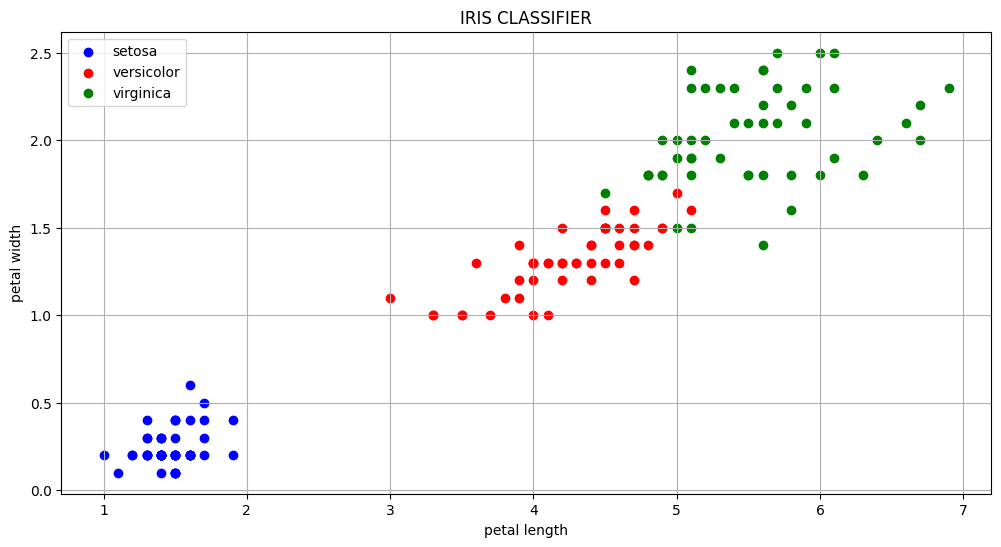

In [24]:
fig,ax=plt.subplots()
fig.set_size_inches(12,6)

ax.scatter(setosa['petal_length'],setosa['petal_width'],facecolor='blue',label='setosa')
ax.scatter(versicolor['petal_length'],versicolor['petal_width'],facecolor='red',label='versicolor')
ax.scatter(virginica['petal_length'],virginica['petal_width'],facecolor='green',label='virginica')

ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.grid()
ax.set_title('IRIS CLASSIFIER')
ax.legend()

Performing classification

When you look at the petal measurements of the three species of iris shown in the plot above, what do you see? It’s pretty obvious to us humans that Iris-virginica has larger petals than Iris-versicolor and Iris-setosa. But computers cannot understand like we do. It needs some algorithm to do so. In order to achieve such a task, we need to implement an algorithm that is able to classify the iris flowers into their corresponding classes.

In [25]:
from sklearn.model_selection import train_test_split
x=dataset.drop(['species','target'],axis=1)
print(x.head(3))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [27]:
x=x.to_numpy()[:,(2,3)]

In [28]:
y=dataset['target']

In [29]:
# SPLITTING INTO TRAIN AND TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=45)

In [30]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
predictions=model.predict(x_test)
predictions

array([1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 3, 3, 1, 3, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 3, 2, 3, 1, 1,
       1, 1, 2, 1, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 1,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 2, 3, 2,
       2, 3, 1, 3, 3, 1, 1, 3, 1, 3])

Performance Measures

Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model, the precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.), Recall(ratio of positive instances that are truly detected by the classifier), and confusion matrix.


In [32]:
from sklearn import metrics

print('PRECISION, RECALL, CONFUSION MATRIX IN TESTING')
#PRECISION RECALL SCORES
print(metrics.classification_report(y_test, predictions))

#CONFUSION MATRIX
print('CONFUSION MATRIX ')
print(metrics.confusion_matrix(y_test, predictions))

PRECISION, RECALL, CONFUSION MATRIX IN TESTING
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      0.93      0.96        41
           3       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

CONFUSION MATRIX 
[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]


In [33]:
import pickle
filename='mlProject'
pickle.dump(model,open(filename, 'wb'))